# *Ion Channel Basics : Single Channel Conductance and Reversal Potential*

The purpose of this notebook is to provide an interactive tool to help you learn about two basic properties of ion channels; reversal potential and unitary conductance. Everything that you need to go through this notebook, including images and helper functions, are included in the respoitory on github. Enjoy!

# Background

Ion channels are one of the most relevant and important classes of proteins that are involved in a seeming infinite range or physiological processes such as action potential propagation, muscle contraction, cell-cell communication, mitosis, bone formation, vision, adution, gustation, etc. Additionally, there are various different classes of ion channels based on the type of stimuli that activates them such as ligand-gated, voltage-gated, mechano-gated, and pH-gated. Although they differ widly in their function, structure, location, gating kinetics, and expression, all ion channels exhibit two fundamental properties; reversal potential and unitary conductance. These two properties are what will be explored in this notebook.

In order to do that, first, you will import real data collected using cell-attached voltage clamp with Neuro2a cells which the mechanosensitive ion channel piezo1. Next you will go through the basics of single-channel openings and what raw electrophysiological data looks like. Next, you will isolate individual single-channel opening events and determine the amplitude of the current passing through the channel at a given voltage. And lastly, using this information, you will learn how to determine both the reversal potential and single channel conductance of piezo1.

In order to progress through this notebook, hit "shift+enter" to run each cell. There will be sections where you will input data directly into a cell or use and interactive figure but this will be explained on a cell-by-cell basis.

# Virtual Environment

Make sure prior to starting this notebook that the correct virtual environment is being used. The requirements.txt or requirements.yml file, located in the github repository, contains all of the packages needed to run this notebook.

# Importing Helper Functions

Before you start looking at data and performing any type of analysis, the first thing you need to do is inport our helper functions. This is accomplished by the line of code **scc_helper_functions import***.  The code for these functions is provided in the python file titled notebook_helper_functions.py which is located in the downloaded repository. These functions will allow us to run code quickly and make the notebook cleaner and easier to follow and you will never need to change any of these functions.

The second line of code, **plt.rcParams["figure.figsize"]** allows you to change the size of the graphs generated in this notebook. The first number controls the width of each figure and the second number control the hight of each figure. Feel free to change these numbers of the figures egnerated are too large or too small.

In [1]:
from scc_helper_functions import*
plt.rcParams["figure.figsize"] = (15,7)

# Loading Data

Now that you have everything in order, you can begin working with real electrophysiology data!

The first thing you need to do is upload the data. The data that is provided in github repository is a CSV file that can be read and converted into useable dataframe using the function **load_dataframe_csv**. A dataframe is similar to an excel file in that there are columns with headings for different variables being measured and rows with values for those variables.

The dataframe that you will be using is broken up into several columns with their respective data below each.
- **ti** = time in miliseconds for current
- **t** = current in pA
- **tv** = time in miliseconds for voltage
- **v** = voltage the cell is exposed to
- **sweep** = what number trial each other variable was recorded from

For this notebook's analysis, the important data are **ti** and **i**. These two will allow us to determine the single channel conductance and reversal potential for our ion channel of interest.

The line of code **df.head()** allows us to visulaize the first few rows of data.





In [2]:
# df_ephys=bc_load_dataframe_asc('C:/Users/msind/Box Sync/bootcamp_practice_data.asc')
# df_ephys.head()

# Single Channel Openings and Summary Traces

In order to determine single channel conductance and reveral potential of a channel it is important that you only analyze single channel opening events. What this means is that in your patch, at an given time, only a single channel is open meaning that any current that is recorded is from one channel. Below is an example trace that shows what these single channel opening and closing events look like.

<img src="notebook_images\single_channel_openings_annotated.PNG" width=900>

The top sections of the trace reflect the channel in the closed state (non_conducting) and the bottom sections reflect the channel in the open state (conducting) with some variance due to electrical noise, both of which will have some variance due to electrical noise. Additionally, you might notice that in the closed state, the data still shows that there is a current. This is due to the fact that no patch is perfect and there is going to be some leak. As you will see later on, what matters is the difference between the open and closed state currents as this will correct for any leak that is present.

The function **summary_plots** will generate a figure showing several different traces. The first will show the different voltages that were recorded from. All other traces bellow are of the raw current for each for each voltage that was recorded at which will be indictaed at the top of each trace.

You can interact with the figure below and zoom in on individual traces to see the single channel openings more closley. To return to the original dimensions of each trace, click the autoscale button in the top right corner of the figure.

In [3]:
fig = bc_summary_plots(df_ephys)
fig.show()

NameError: name 'df_ephys' is not defined

# Isolating Single Channel Openings

Now that you have data showing individual channel opening events, it is time to start analysinge individual events.The main piece of data that can be extracted from each event is the single channel current, or, as explained previously, the difference in the baseline and conducting-state currents. These current aplitudes will vary based on the voltage that each single-channel opening was recorded at, but more on that later.

In order to accurately determine single channel conductance, it is important to analyze well-ioslated channel openings. Additionally, you only need to look at when one channel is open at a time. Because of this, you need to isolate specific channel opening events rather than take all data from every trace.

To do this, use the summary traces above to isolate specific the times of channel openings. You can zoom in on any trace to get a better estimate of the timecourse of each event. You want to aim for equal parts open and closed and to avoid short flickers. Below is an example to use as a reference.

<img src="notebook_images\isolated_single_channel_opening.PNG" width=900>

Once you have determined the start and end point from a specific voltage that you want to analyze, input those values into the box below in their appropriate places. The isolated scetion will be shown below to ensure that you have selected the correct section of the sweep. The **isolate_openings** function takes the values you  used for voltage, start_time, and end_time, and uses them to extract the data you want to isolate and display it so you can visually confrim your selection.


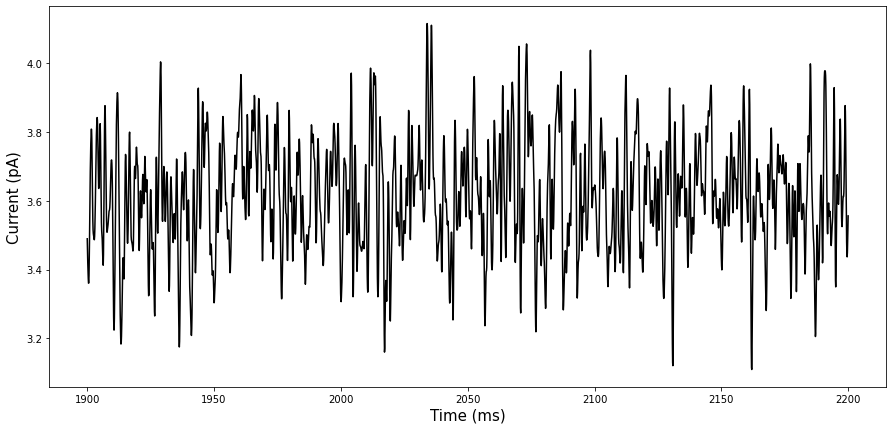

In [4]:
voltage = 100
start_time = 1900
end_time = 2200

isolated_data = isolate_openings(df_ephys, voltage, start_time, end_time)

# Current Frequency Histograms and Estimating Current

Once you have an isolated channel opening event, the next step is to generate a current frequency histogram. It is easy to see that there is some peak-to-peak noise in the current values, making it difficult to determine what the actual current passing through the channel is. Therefore, a frequency histogram of the current values allows you to make an ccurate estimate of that that "true current" value.

The code **basic_current_histogram** will take the isolated data you selected above and generate a current frequency histogram with 100 bins. Since you are only looking at a single channel, there should be two gaussian distributions with two peaks. One of the peaks will reflect the open state of the channel and the other will reflect the closed state of the channel. Sometimes there will be additional peaks that may represent a sub-conduction state or having more than one channel-opening event occuring at the same time, but for now you are only going to focus on the open and closed state of one channel.

It is alright if the peaks are not the same size. This is mostl likely due to differences in the percentage of time the channel is open and closed for the time period you selected. If you are unable to visually pick out two peaks, you will need to pick a different period of time to analyze.

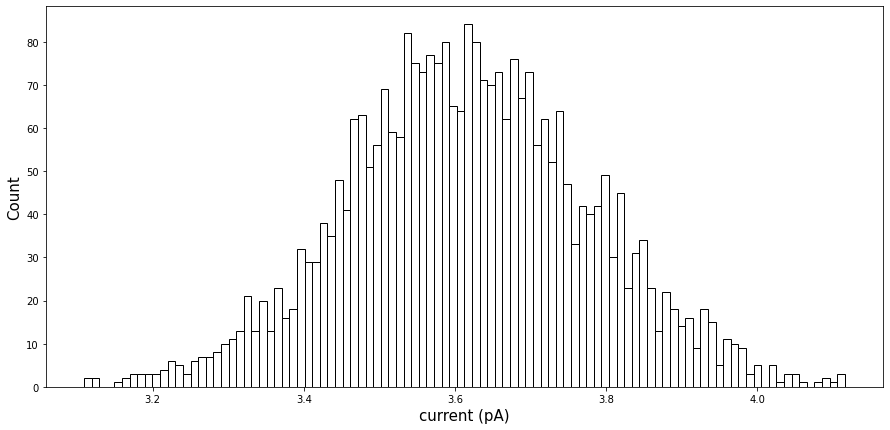

In [5]:
current_hist = basic_current_histo(isolated_data, 100)

In order to obtain the difference in current between the conducting and non-conducting and get the single channel current, you will need to fit the data with a double gaussian using the **double_fit_plot** function. This function will 1) show an overlay of the fit that it generated from your data and 2) print the single channel current.

Since the function makes no assumptions about your data, you will need to provide "guesses" for three parameters for each fit. Those parameters are amplitude, center of the peak, and variance. Using the histogram above, input your guesses for each peak, with peak one being the leftward most peak and peak two being the right most peak.

After inputing guesses, run the code. If there is an error message that a fit was not possible, try different guesses. If after several tries you are still not able to get the code to run, go back and select a different single channel open event. Once the fit is complete, the historgam with an overlayed fit, along with a value for unitary current, should appear.

Unitary current = -25.61766053205307


C:\Users\msind\anaconda3\envs\bootcamp_2022\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated



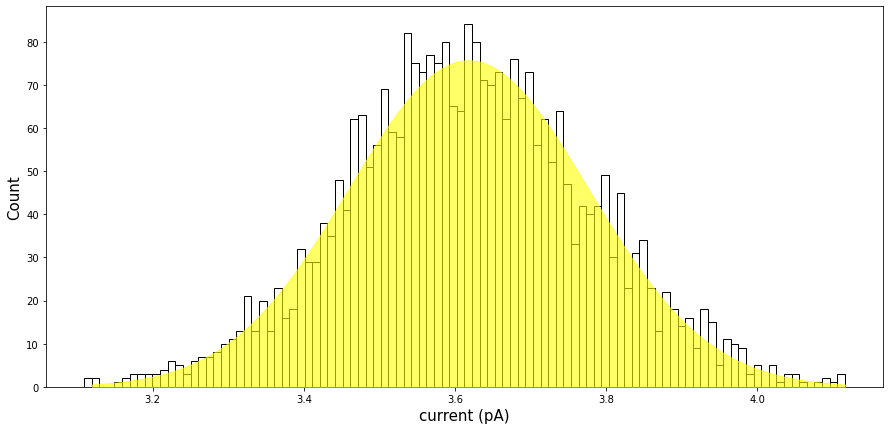

In [6]:
amplitude_1_guess = 100
center_1_guess = 3.6
variance_1_guess = 2
amplitude_2_guess = 100
center_2_guess = -22
variance_2_guess = 2 

fit_guesses = [amplitude_1_guess, center_1_guess, variance_1_guess, amplitude_2_guess, center_2_guess, variance_2_guess]
final_plot, center1, center2 = double_fit_plot(current_hist, isolated_data, fit_guesses, 100)

In the cell below, please input the voltage that you were analyzing along with the unitary current printed above into the appropriate lists (inside the brackets) separated by a comma. Add each new input to the end of the list so the voltage and current are in the same position in their respective list.

In [7]:
voltage_list = []
unitary_current_list = []

Once you do that, repeat this process to determine the single channel currents for different opening events at different voltages. Try to get at least three opening events per voltage. An example of what your lists, in terms of formatting but not values, should look like is shown below:

<img src="notebook_images\list_examples.PNG" width=600>



Once you have complete lists, you are ready to move on to the next seciton!

# Unitary Conductance and Reversal Potential

At different votages, the amout of current that will pass through a channel will change. This is due to the fact that with increased voltage differences across the membrane, the larger the driving force will be and therefore the greater the number of ions passing through a channel will be. For example, if you are looking at an ion channel that is a non-selective cation channel, a membrane potential of -60mV will result in a weaker driving force for positivly charged ions to enter the cell through the channel than a cell with a membrane potential of -80mV. Because of this property, you are able to generate I (current )/ V (voltage) curves. An example trace is shown below.

<img src="notebook_images\example_iv.PNG" width=900>

From these graphs, there are two major channel properties that can be determined. The first is the reversal potential of the channel. This is the voltage at which the currents of a channel switch from being inward (negative) to outward (positive) or, more simply, where the I/V curve crosses the x-axis. This value is useful in that it gives some insight into the selectivity of the channel. For example, if a channel has a reveral potential around -80mV, that channel is most likely potassium selective since -80 is the equilibrium potential for potassium. Additionally, if a channel has a reveral potential around +60mV, that channel is most likely sodium selective since +60 is the equilibrium potential for sodium.

For the example trace, the reversal potential is around 0mV which indictaes that the channel is a non-selective cation channel.

The second property that can be determined from an I/V curve is the unitary conductance of the channel. This is a measure of how much current will pass through a channel at a given voltage and can be expressed as the following equation: 

<img src="notebook_images\unitary_conductance_equation.PNG">

where i is current, V is voltage, and g is conductance measured in Siemens. This value, in conjunction with the reversal potential, acts as a identifier for specific ion channels since each channel will have a different unitary conductance.

To determine both the reversal potential and unitary conductance, you will need to fit your data with a linear fit. For your data, this is possible since at the voltages being recorded from, the channel has a unitary current that is directly proportional to the voltage provided. And since you have three different voltages, you should be able to exrapolate both an x-intercept (reversal potential) and unitary conductance (slope).

To do this, all you have to do is run the cell bellow which contains the function **channel_properties**. What this function does is it takes your voltage_list and unitary_current_list, graphs them, fits them with a linear fit, and prints both the reversal potential and unitary conductance.

In the graph that is generated, the blue dots are your data, the red line is the linear fit, and the yellow dot is the reversal potential value (x-intercept).

Reversal potential = 0.8255 mV
Sigle channel conductance = 20.2274 pS


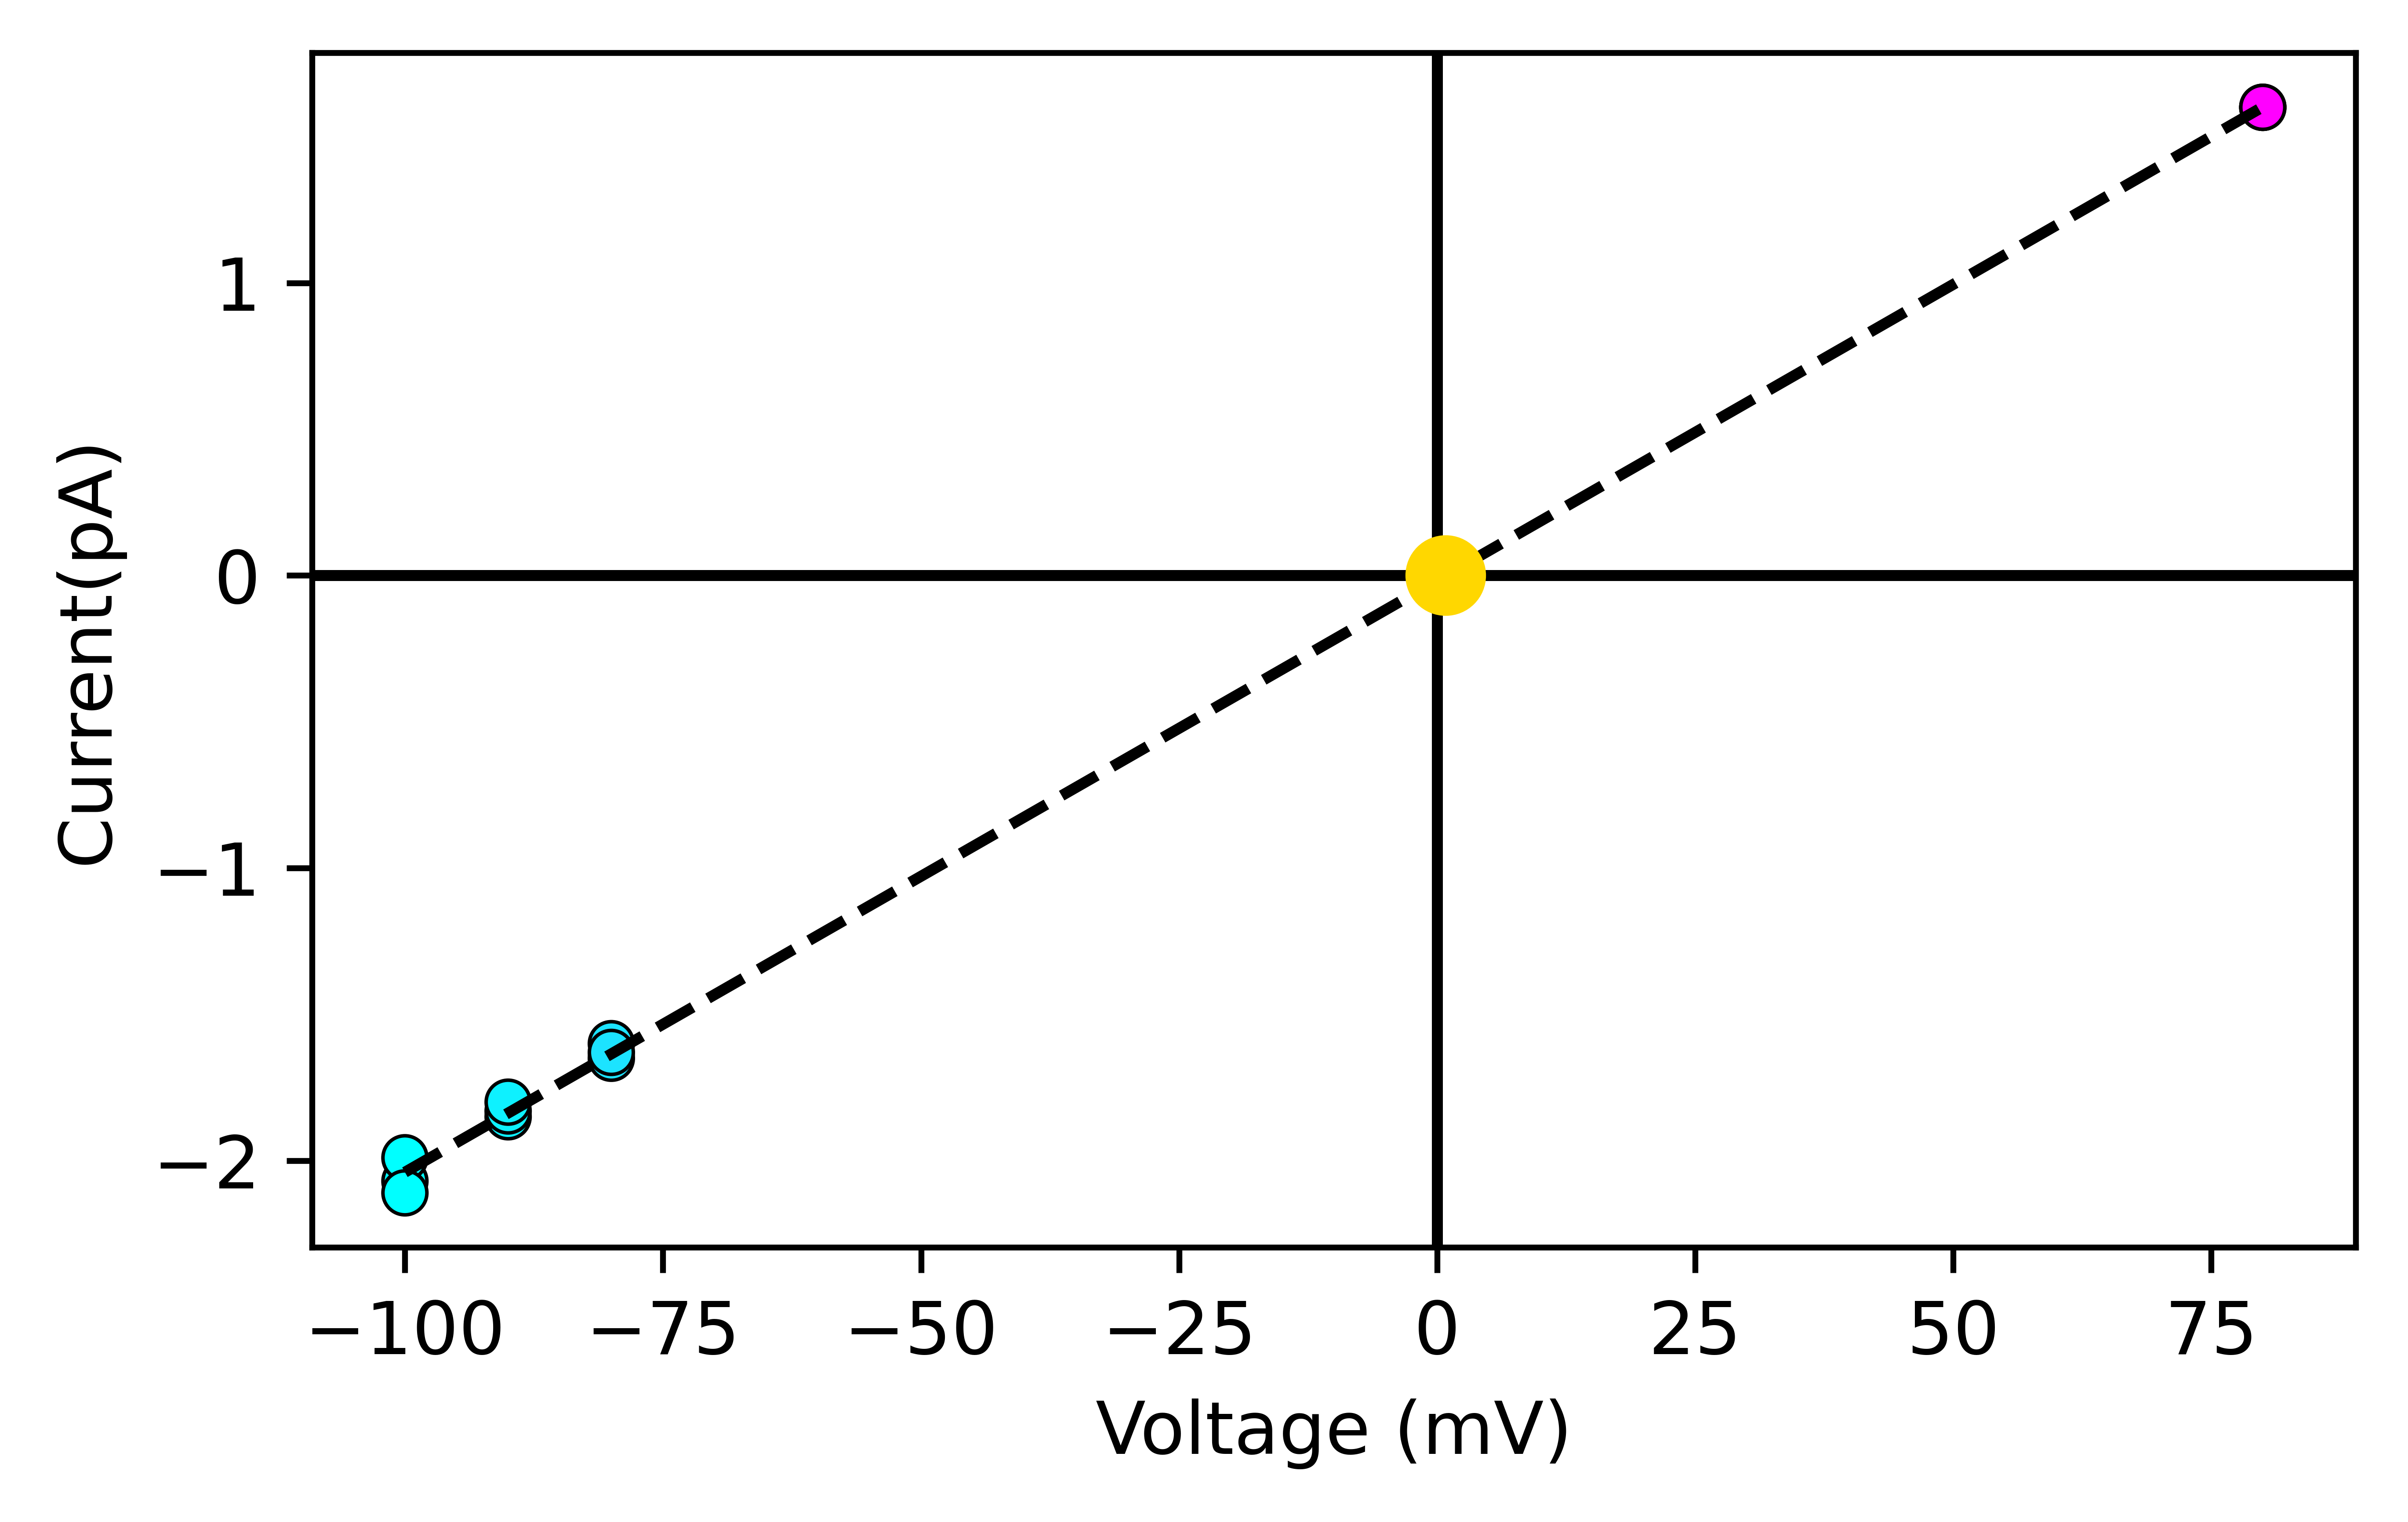

In [8]:
reversal_potential_plot2 = channel_properties(voltage_list, unitary_current_list)

And that is all! You have now gone through the process of analyzing single channel data from start to finish. This type of analysis can be applied to any ion channel with various different caveats. But feel free to look at the helper_functions code and apply it to your own data. Thank you and happy patching!